## Arrhythmia on ECG Classification

#### About Dataset (MIT-BIH)
The MIT-BIH Arrhythmia Database contains 48 half-hour excerpts of two-channel ambulatory ECG recordings, obtained from 47 subjects studied by the BIH Arrhythmia Laboratory between 1975 and 1979. Twenty-three recordings were chosen at random from a set of 4000 24-hour ambulatory ECG recordings.
The recordings were digitized at 360 samples per second per channel with 11-bit resolution over a 10 mV range. Two or more cardiologists independently annotated each record; disagreements were resolved to obtain the computer-readable reference annotations for each beat (approximately 110,000 annotations in all) included with the database.


**Some essential details about the Arrhthmia ECG Database:**


Number of Samples: 109446

Number of Categories: 5

Sampling Frequency: 125Hz

Data Source: Physionet's MIT-BIH Arrhythmia Dataset

Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

## Perform exploratory data analysis (EDA)


###### Import Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt



# Set display option to show all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)


##### Load and Explore the Dataset

In [2]:
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [3]:
train_df.shape

(87554, 188)

## Basic Overview

In [4]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,0.147059,0.132353,0.127451,0.134804,0.137255,0.112745,0.107843,0.105392,0.107843,0.098039,0.093137,0.102941,0.100490,0.105392,0.102941,0.117647,0.105392,0.122549,0.127451,0.142157,0.147059,0.144608,0.174020,0.230392,0.237745,0.247549,0.230392,0.225490,0.198529,0.176471,0.132353,0.125000,0.117647,0.122549,0.112745,0.129902,0.115196,0.083333,0.000000,0.066176,0.306373,0.612745,0.860294,1.000000,0.958333,0.745098,0.303922,0.164216,0.205882,0.164216,0.102941,0.095588,0.090686,0.100490,0.095588,0.098039,0.093137,0.098039,0.095588,0.112745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,0.108262,0.082621,0.079772,0.074074,0.014245,0.011396,0.062678,0.051282,0.056980,0.048433,0.028490,0.031339,0.076923,0.025641,0.028490,0.037037,0.094017,0.085470,0.039886,0.059829,0.074074,0.079772,0.091168,0.099715,0.108262,0.088319,0.091168,0.065527,0.085470,0.088319,0.076923,0.082621,0.096866,0.099715,0.133903,0.102564,0.039886,0.065527,0.074074,0.082621,0.085470,0.056980,0.045584,0.102564,0.039886,0.011396,0.017094,0.031339,0.005698,0.008547,0.031339,0.051282,0.056980,0.088319,0.065527,0.011396,0.056980,0.039886,0.039886,0.025641,0.002849,0.019943,0.025641,0.011396,0.028490,0.019943,0.022792,0.034188,0.014245,0.051282,0.068376,0.139601,0.287749,0.527066,0.777778,1.000000,0.888889,0.492877,0.190883,0.088319,0.062678,0.034188,0.00000,0.034188,0.017094,0.002849,0.000000,0.048433,0.048433,0.054131,0.042735,0.054131,0.059829,0.062678,0.071225,0.076923,0.099715,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,0.054054,0.037838,0.043243,0.021622,0.045946,0.035135,0.056757,0.035135,0.037838,0.032432

In [5]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,0.198778,0.203550,0.208776,0.212885,0.218393,0.224966,0.231377,0.237123,0.242582,0.247923,0.253749,0.259748,0.266244,0.272734,0.279355,0.285588,0.291808,0.297672,0.303384,0.308795,0.313890,0.318454,0.322087,0.324891,0.326737,0.327817,0.327931,0.326746,0.324326,0.320537,0.316234,0.311407,0.306520,0.301696,0.297087,0.292225,0.287838,0.283965,0.280724,0.278051,0.276432,0.275132,0.274152,0.273004,0.272354,0.271696,0.271413,0.271276,0.271590,0.272307,0.273436,0.274492,0.275570,0.276823,0.278993,0.281349,0.282139,0.280225,0.276547,0.272064,0.268006,0.264239,0.260910,0.257082,0.254712,0.254155,0.255646,0.257813,0.259830,0.259958,0.258528,0.256549,0.255682,0.254850,0.253470,0.251946,0.250425,0.247326,0.241640,0.234124,0.226143,0.218646,0.212149,0.207332,0.204524,0.202845,0.201995,0.201829,0.201814,0.200801,0.

#### Label Column :

In [6]:
train_df[187].unique()

array([0., 1., 2., 3., 4.])

#### There are 5 Classes

1. **Class 0: "N"**
   - Description: Normal heartbeats.

2. **Class 1: "S"**
   - Description: Supra-ventricular premature.

3. **Class 2: "V"**
   - Description: Ventricular escape.

4. **Class 3: "F"**
   - Description: Fusion of ventricular and normal.

5. **Class 4: "Q"**
   - Description: Unclassified heartbeats.
artbeats.
ified heartbeats.
ats.

## Display basic information about the dataset

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [8]:
print("Number of samples:", len(train_df))
print("Number of features:", train_df.shape[1])


Number of samples: 87554
Number of features: 188


In [9]:
train_df.head(20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,0.147059,0.132353,0.127451,0.134804,0.137255,0.112745,0.107843,0.105392,0.107843,0.098039,0.093137,0.102941,0.100490,0.105392,0.102941,0.117647,0.105392,0.122549,0.127451,0.142157,0.147059,0.144608,0.174020,0.230392,0.237745,0.247549,0.230392,0.225490,0.198529,0.176471,0.132353,0.125000,0.117647,0.122549,0.112745,0.129902,0.115196,0.083333,0.000000,0.066176,0.306373,0.612745,0.860294,1.000000,0.958333,0.745098,0.303922,0.164216,0.205882,0.164216,0.102941,0.095588,0.090686,0.100490,0.095588,0.098039,0.093137,0.098039,0.095588,0.112745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,0.108262,0.082621,0.079772,0.074074,0.014245,0.011396,0.062678,0.051282,0.056980,0.048433,0.028490,0.031339,0.076923,0.025641,0.028490,0.037037,0.094017,0.085470,0.039886,0.059829,0.074074,0.079772,0.091168,0.099715,0.108262,0.088319,0.091168,0.065527,0.085470,0.088319,0.076923,0.082621,0.096866,0.099715,0.133903,0.102564,0.039886,0.065527,0.074074,0.082621,0.085470,0.056980,0.045584,0.102564,0.039886,0.011396,0.017094,0.031339,0.005698,0.008547,0.031339,0.051282,0.056980,0.088319,0.065527,0.011396,0.056980,0.039886,0.039886,0.025641,0.002849,0.019943,0.025641,0.011396,0.028490,0.019943,0.022792,0.034188,0.014245,0.051282,0.068376,0.139601,0.287749,0.527066,0.777778,1.000000,0.888889,0.492877,0.190883,0.088319,0.062678,0.034188,0.000000,0.034188,0.017094,0.002849,0.000000,0.048433,0.048433,0.054131,0.042735,0.054131,0.059829,0.062678,0.071225,0.076923,0.099715,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,0.054054,0.037838,0.043243,0.021622,0.045946,0.035135,0.056

#### We've noticed that there are records ending with zero valued columns. We have to handle them.

### Check for Zeros:

In [10]:
# Drop the last column
df_without_last_column = train_df.iloc[:, :-1]

# Calculate the percentage of zeros for each column
zero_percentages = (df_without_last_column == 0).mean()

# Identify columns where the majority of values are zeros ( 90% or more)
columns_with_majority_zeros = zero_percentages[zero_percentages >= 0.9].index
 
print("Columns with majority zeros:")
print(columns_with_majority_zeros)



Columns with majority zeros:
Int64Index([149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
            162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
            175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186],
           dtype='int64')


In [11]:
num_columns_with_majority_zeros = len(columns_with_majority_zeros)
print("Total number of columns with majority zeros:", num_columns_with_majority_zeros)

Total number of columns with majority zeros: 38


In [12]:
columns_to_drop =[149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
            162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
            175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]
train_df = train_df.drop(columns_to_drop, axis=1)


In [13]:
# Resetting the index
train_df.reset_index(drop=True, inplace=True)

# Counting the number of columns in the modified DataFrame
num_columns = len(train_df.columns)

print("Number of columns after dropping:", num_columns)

Number of columns after dropping: 150


In [14]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,0.147059,0.132353,0.127451,0.134804,0.137255,0.112745,0.107843,0.105392,0.107843,0.098039,0.093137,0.102941,0.100490,0.105392,0.102941,0.117647,0.105392,0.122549,0.127451,0.142157,0.147059,0.144608,0.174020,0.230392,0.237745,0.247549,0.230392,0.225490,0.198529,0.176471,0.132353,0.125000,0.117647,0.122549,0.112745,0.129902,0.115196,0.083333,0.000000,0.066176,0.306373,0.612745,0.860294,1.000000,0.958333,0.745098,0.303922,0.164216,0.205882,0.164216,0.102941,0.095588,0.090686,0.100490,0.095588,0.098039,0.093137,0.098039,0.095588,0.112745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,0.108262,0.082621,0.079772,0.074074,0.014245,0.011396,0.062678,0.051282,0.056980,0.048433,0.028490,0.031339,0.076923,0.025641,0.028490,0.037037,0.094017,0.085470,0.039886,0.059829,0.074074,0.079772,0.091168,0.099715,0.108262,0.088319,0.091168,0.065527,0.085470,0.088319,0.076923,0.082621,0.096866,0.099715,0.133903,0.102564,0.039886,0.065527,0.074074,0.082621,0.085470,0.056980,0.045584,0.102564,0.039886,0.011396,0.017094,0.031339,0.005698,0.008547,0.031339,0.051282,0.056980,0.088319,0.065527,0.011396,0.056980,0.039886,0.039886,0.025641,0.002849,0.019943,0.025641,0.011396,0.028490,0.019943,0.022792,0.034188,0.014245,0.051282,0.068376,0.139601,0.287749,0.527066,0.777778,1.000000,0.888889,0.492877,0.190883,0.088319,0.062678,0.034188,0.00000,0.034188,0.017094,0.002849,0.000000,0.048433,0.048433,0.054131,0.042735,0.054131,0.059829,0.062678,0.071225,0.076923,0.099715,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,0.054054,0.037838,0.043243,0.021622,0.045946,0.035135,0.056757,0.035135,0.037838,0.032432,0.043243,0.037838,0.051351,0.029730,0.048649,0.029730,0.056757,0.051351,0.078378,0.064865,0.094595,0.097297,0.116216,0.094595,0.091892,0.064865,0.067568,0.040541,0.048649,0.018919,0.021622,0.008108,0.029730,0.010811,0.021622,0.005405,0.032432,0.018919,0.021622,0.040541,0.240541,0.589189,0.964865,0.583784,0.121622,0.000000,0.035135,0.035135,0.027027,0.021622,0.029730,0.010811,0.032432,0.021622,0.051351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

## Visualize a few ECG signals for each class

### Class 0: "N" - Normal heartbeats.



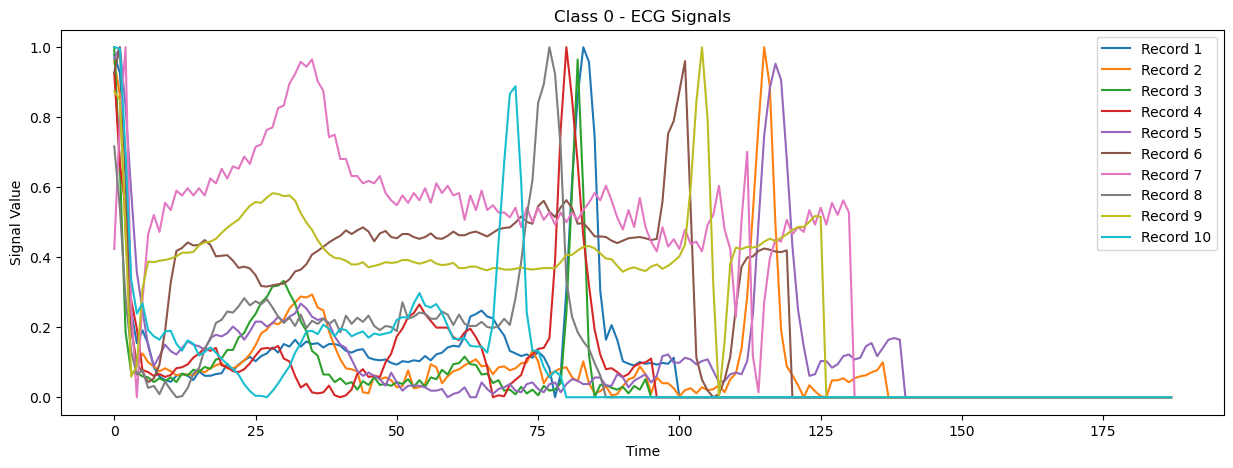

In [15]:
target_column_index = 187

# Filter the DataFrame for Class 0
class_0_samples = train_df[train_df[target_column_index] == 0].head(10)

# Plot the curves for Class 0
plt.figure(figsize=(15, 5))
for i in range(len(class_0_samples)):
    plt.plot(class_0_samples.iloc[i, :target_column_index], label=f'Record {i+1}')

plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Class 0 - ECG Signals')
plt.legend()
plt.show()


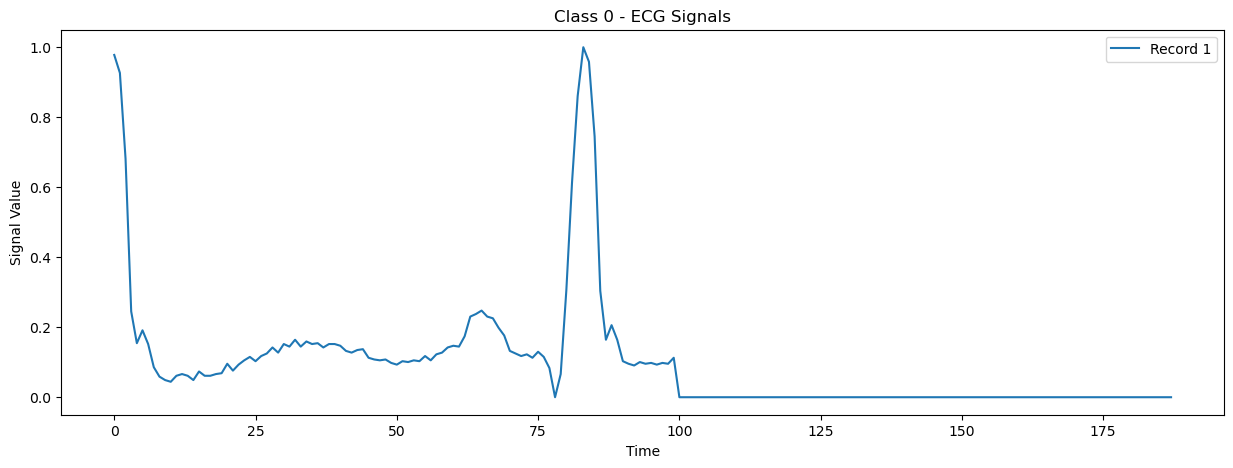

In [37]:
target_column_index = 187

# Filter the DataFrame for Class 0
class_0_samples = train_df[train_df[target_column_index] == 0].head(1)

# Plot the curves for Class 0
plt.figure(figsize=(15, 5))
for i in range(len(class_0_samples)):
    plt.plot(class_0_samples.iloc[i, :target_column_index], label=f'Record {i+1}')

plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Class 0 - ECG Signals')
plt.legend()
plt.show()


### **Class 1: "S"** -  Supra-ventricular premature.



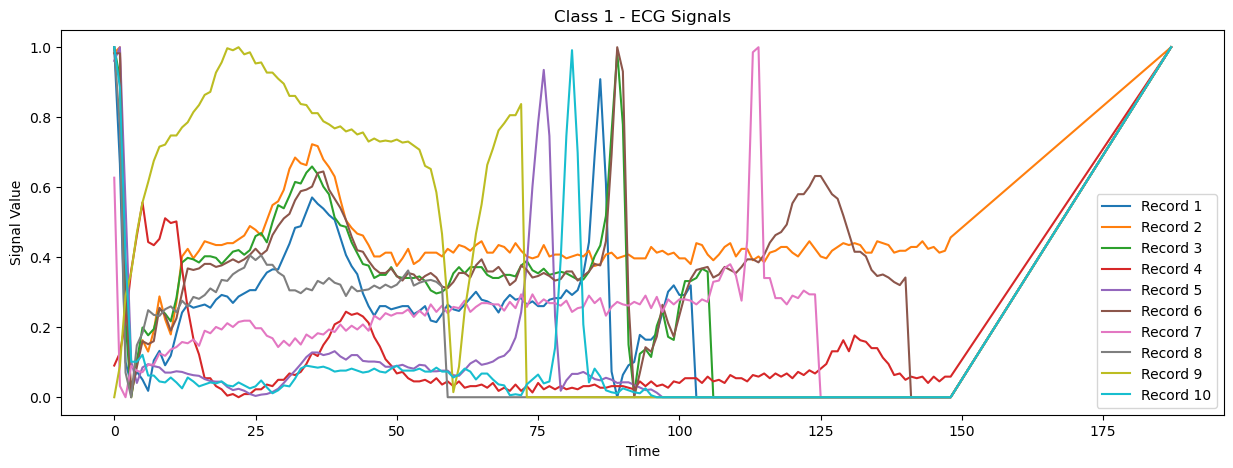

In [16]:
target_column_index = 187

# Filter the DataFrame for Class 0
class_0_samples = train_df[train_df[target_column_index] == 1].head(10)

# Plot the curves for Class 0
plt.figure(figsize=(15, 5))
for i in range(len(class_0_samples)):
    plt.plot(class_0_samples.iloc[i, :target_column_index], label=f'Record {i+1}')

plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Class 1 - ECG Signals')
plt.legend()
plt.show()


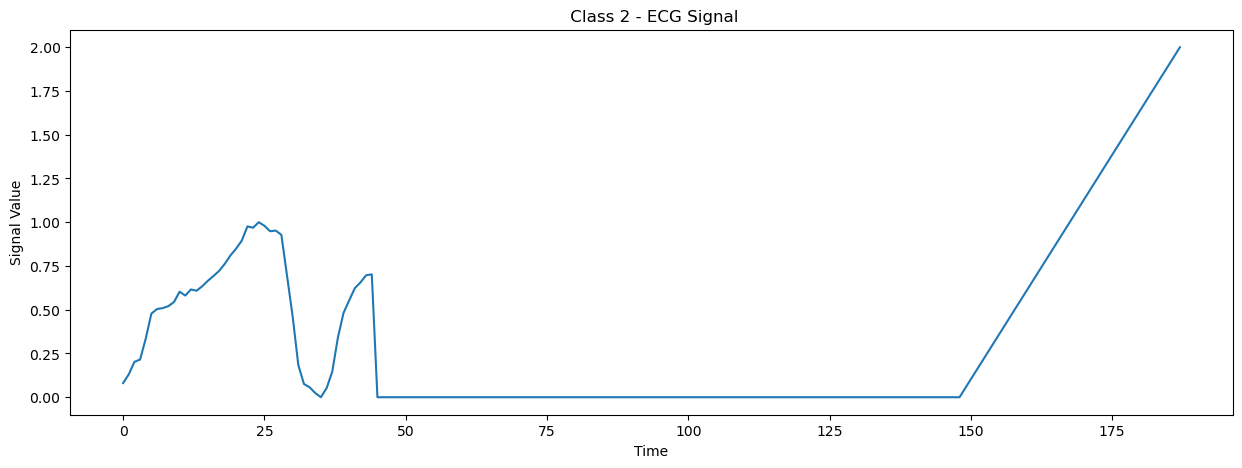

In [42]:
import random

target_column_index = 187

# Filter the DataFrame for Class 2
class_2_samples = train_df[train_df[target_column_index] == 2]

# Randomly choose one sample
random_sample = class_2_samples.sample(n=1, random_state=42)

# Plot the curve for the randomly chosen sample
plt.figure(figsize=(15, 5))
plt.plot(random_sample.iloc[0, :target_column_index])
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title(' Class 2 - ECG Signal')
plt.show()


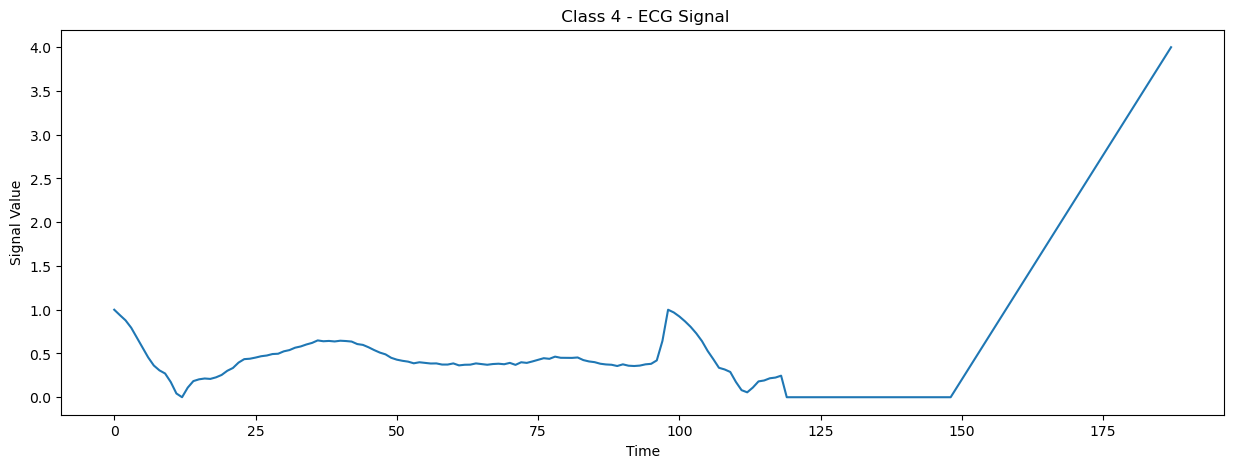

In [45]:
import random

target_column_index = 187

# Filter the DataFrame for Class 2
class_2_samples = train_df[train_df[target_column_index] == 4]

# Randomly choose one sample
random_sample = class_2_samples.sample(n=1, random_state=42)

# Plot the curve for the randomly chosen sample
plt.figure(figsize=(15, 5))
plt.plot(random_sample.iloc[0, :target_column_index])
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title(' Class 4 - ECG Signal')
plt.show()


###  **Class 2: "V"** - Ventricular escape.

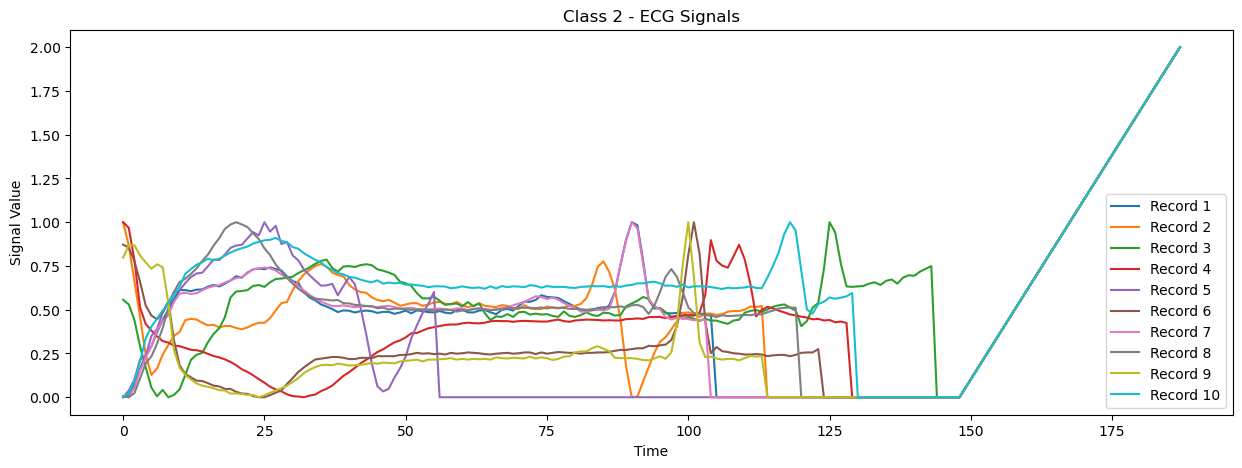

In [17]:
target_column_index = 187

# Filter the DataFrame for Class 2
class_0_samples = train_df[train_df[target_column_index] == 2].head(10)

# Plot the curves for Class 2
plt.figure(figsize=(15, 5))
for i in range(len(class_0_samples)):
    plt.plot(class_0_samples.iloc[i, :target_column_index], label=f'Record {i+1}')

plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Class 2 - ECG Signals')
plt.legend()
plt.show()


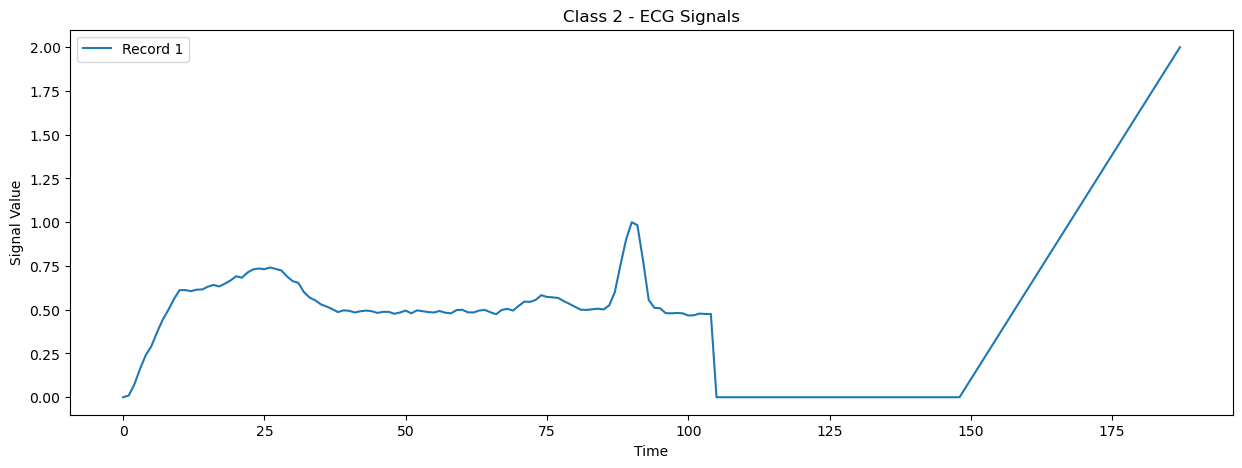

In [40]:
target_column_index = 187

# Filter the DataFrame for Class 2
class_0_samples = train_df[train_df[target_column_index] == 2].head(1)

# Plot the curves for Class 2
plt.figure(figsize=(15, 5))
for i in range(len(class_0_samples)):
    plt.plot(class_0_samples.iloc[i, :target_column_index], label=f'Record {i+1}')

plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Class 2 - ECG Signals')
plt.legend()
plt.show()


### **Class 3: "F"** - Fusion of ventricular and normal.


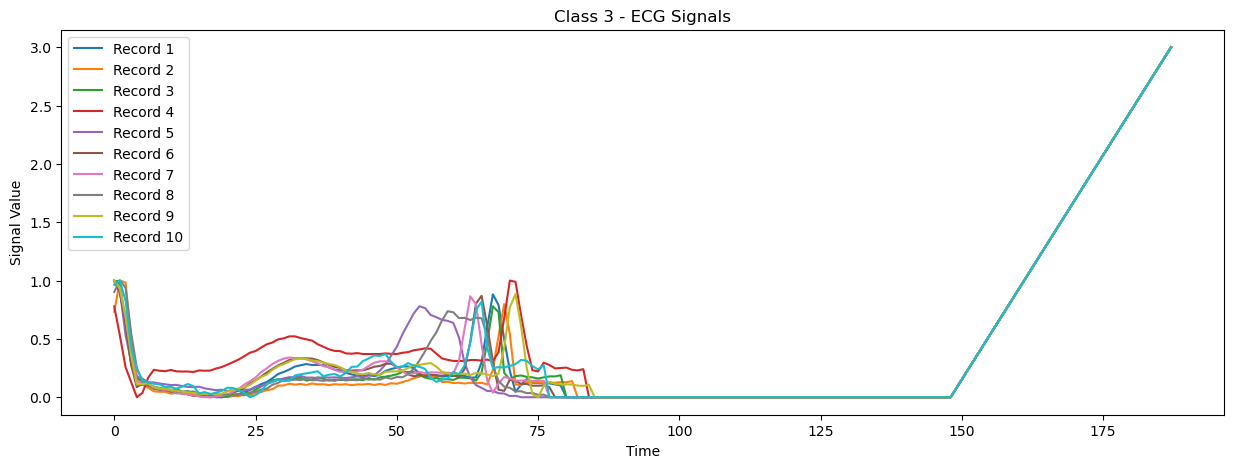

In [18]:
import matplotlib.pyplot as plt

target_column_index = 187

# Filter the DataFrame for Class 3
class_0_samples = train_df[train_df[target_column_index] == 3].head(10)

# Plot the curves for Class 3
plt.figure(figsize=(15, 5))
for i in range(len(class_0_samples)):
    plt.plot(class_0_samples.iloc[i, :target_column_index], label=f'Record {i+1}')

plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Class 3 - ECG Signals')
plt.legend()
plt.show()


### Class 4: "Q" -  Unclassified heartbeats. artbeats. ified heartbeats. ats.

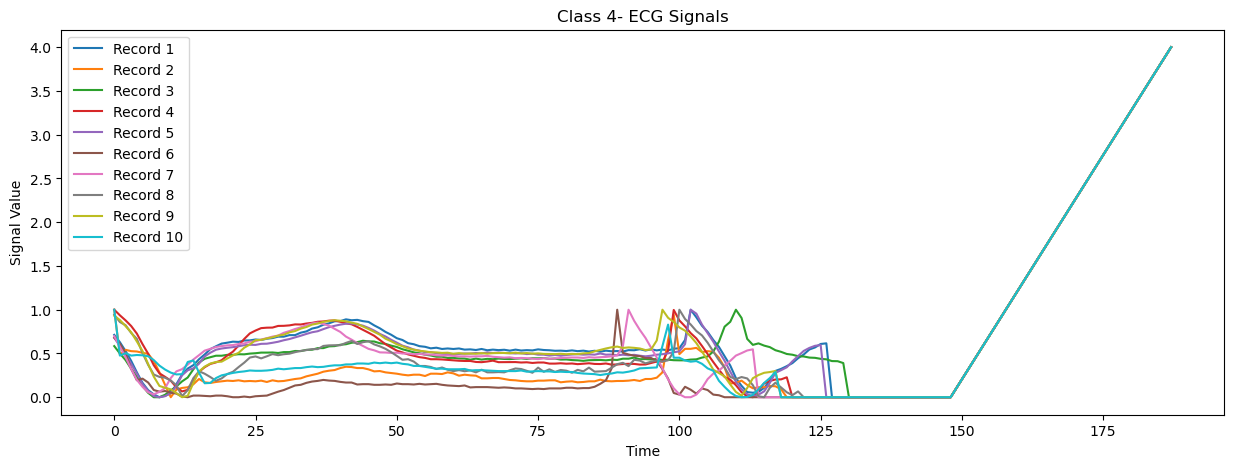

In [19]:
import matplotlib.pyplot as plt

target_column_index = 187

# Filter the DataFrame for Class 4
class_0_samples = train_df[train_df[target_column_index] == 4].head(10)

# Plot the curves for Class 4
plt.figure(figsize=(15, 5))
for i in range(len(class_0_samples)):
    plt.plot(class_0_samples.iloc[i, :target_column_index], label=f'Record {i+1}')

plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Class 4- ECG Signals')
plt.legend()
plt.show()


## Balance of dataset

**Target Column: Explore the distribution of classes**

In [20]:
value_counts = train_df.iloc[:, -1].value_counts()
print(value_counts)

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


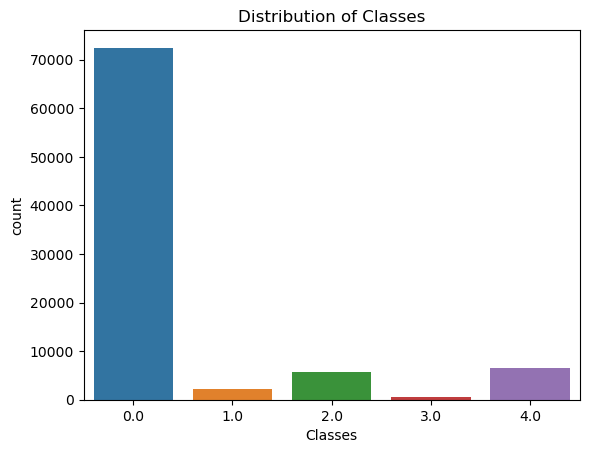

In [21]:
sns.countplot(x=train_df.iloc[:, -1])
plt.title('Distribution of Classes')
plt.xlabel("Classes")
plt.show()

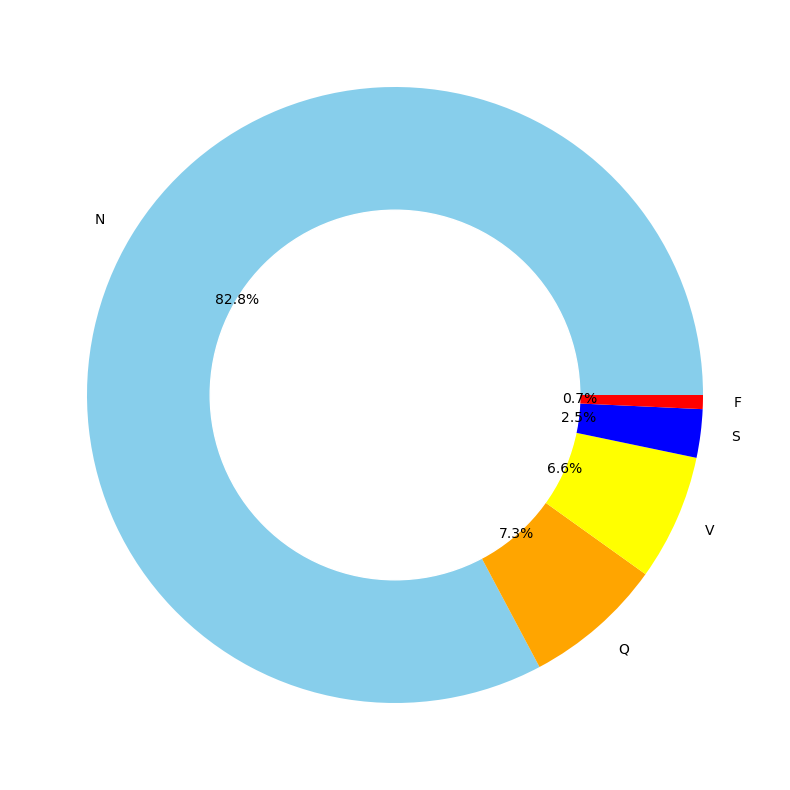

In [22]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.6, color='white')
equilibre=train_df[187].value_counts()

plt.pie(equilibre, labels=['N','Q','V','S','F'], colors=['skyblue','orange','yellow','blue','red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


From this plot, it is evident that there is a significant imbalance in the number of samples across different classes in the dataset.


## Resampling technique :

Oversampling 

In [23]:
# Check the number of columns in your DataFrame
num_columns = train_df.shape[1]
print("Number of columns:", num_columns)


Number of columns: 150


In [24]:
# Split features and labels 
train_features = train_df.iloc[:, :-1]
train_labels = train_df.iloc[:, -1]


In [25]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(train_features, train_labels)


## Model :

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(149, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(5, activation='softmax')  # 5 output units for 5 classes
])


In [27]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32)


Epoch 1/10
11324/11324 [==============================] - 177s 15ms/step - loss: 0.2543 - accuracy: 0.9097
Epoch 2/10
11324/11324 [==============================] - 176s 16ms/step - loss: 0.1352 - accuracy: 0.9522
Epoch 3/10
11324/11324 [==============================] - 181s 16ms/step - loss: 0.1074 - accuracy: 0.9628
Epoch 4/10
11324/11324 [==============================] - 147s 13ms/step - loss: 0.0923 - accuracy: 0.9678
Epoch 5/10
11324/11324 [==============================] - 140s 12ms/step - loss: 0.0836 - accuracy: 0.9712
Epoch 6/10
11324/11324 [==============================] - 146s 13ms/step - loss: 0.0771 - accuracy: 0.9735
Epoch 7/10
11324/11324 [==============================] - 146s 13ms/step - loss: 0.0729 - accuracy: 0.9753
Epoch 8/10
11324/11324 [==============================] - 145s 13ms/step - loss: 0.0698 - accuracy: 0.9762
Epoch 9/10
11324/11324 [==============================] - 145s 13ms/step - loss: 0.0675 - accuracy: 0.9770
Epoch 10/10
11324/11324 [============

In [28]:
import numpy as np

# Assuming test_df is already defined
test_features = test_df.iloc[:, :149].values  # Use only the first 149 features
test_labels = test_df.iloc[:, -1].values

# Print the shape of the test features array
print("Shape of test_features array:", test_features.shape)

# Ensure that the number of features matches the expected number (149)
expected_num_features = 149
if test_features.shape[1] != expected_num_features:
    raise ValueError(f"The number of features in test_features ({test_features.shape[1]}) does not match the expected number of features ({expected_num_features}).")

# Reshape the features
num_samples = test_features.shape[0]
test_features_reshaped = test_features.reshape(num_samples, expected_num_features, 1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_features_reshaped, test_labels)
print("Test Accuracy:", test_accuracy)


Shape of test_features array: (21892, 149)
685/685 [==============================] - 2s 3ms/step - loss: 0.1083 - accuracy: 0.9746
Test Accuracy: 0.9745569229125977


## Test - get data from firebase :

pip install firebase-admin


In [29]:
import firebase_admin
from firebase_admin import credentials, db

# Initialize Firebase Admin SDK with your service account key
cred = credentials.Certificate('ecg-app-274f2-firebase-adminsdk-tz8tz-3b514560ff.json')
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://ecg-app-274f2-default-rtdb.firebaseio.com/'  
})

# Reference to the patient's node in Firebase
ref = db.reference('/Patient/l0BVe1lii9aF2nU3JUetxTtsM7I2/ecgData')

# Retrieve data from Firebase
ecg_data = ref.get()
print(ecg_data)  


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
import numpy as np

# Assuming ecg_data is the dictionary retrieved from Firebase
ecg_values = [data['ecg_value'] for key, data in ecg_data.items()] 

# Split the ECG values into segments of length 149
segment_length = 149
num_segments = len(ecg_values) // segment_length
segments = [ecg_values[i * segment_length : (i + 1) * segment_length] for i in range(num_segments)]

# Convert segments to numpy array and reshape to match model input shape
ecg_segments_array = np.array(segments).reshape(-1, segment_length, 1)

# Make predictions using the model
predictions = model.predict(ecg_segments_array)

# Assuming you want to get the class with the highest probability as the predicted class for each segment
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted classes
print("Predicted Classes:", predicted_classes)


17/17 [==============================] - 0s 3ms/step
Predicted Classes: [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 1 3 0 1 0 0 0 0 0 3 3 3 3 3 3 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [31]:
import numpy as np

# Assuming ecg_data is the dictionary retrieved from Firebase
ecg_values_all = [data['ecg_value'] for key, data in ecg_data.items()] 

# Taking the last 149 values
ecg_values_last_149 = ecg_values_all[-149:]

# Convert the last 149 values to a single segment
segment_length = 149
num_segments = 1
segments = [ecg_values_last_149[i * segment_length : (i + 1) * segment_length] for i in range(num_segments)]

# Convert segments to numpy array and reshape to match model input shape
ecg_segments_array = np.array(segments).reshape(-1, segment_length, 1)

# Make predictions using the model
predictions = model.predict(ecg_segments_array)

# Assuming you want to get the class with the highest probability as the predicted class for each segment
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted classes
print("Predicted Classes:", predicted_classes)


1/1 [==============================] - 0s 18ms/step
Predicted Classes: [0]


In [32]:
import numpy as np

class_1_row = train_df[train_df[187] == 3].iloc[0]

# Extract features from the selected row (excluding the target column)
input_features = class_1_row.iloc[:-1].values

# Reshape the input features to match the input shape expected by the LSTM model
input_data = input_features.reshape(1, input_features.shape[0], 1)

# Make predictions using the LSTM model
predicted_probabilities = model.predict(input_data)

# Convert predicted probabilities to class labels
predicted_class = np.argmax(predicted_probabilities)

print("Predicted Class Label:", predicted_class)


1/1 [==============================] - 0s 18ms/step
Predicted Class Label: 3


## Saving model :

In [33]:
import tensorflow as tf
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to a file
with open('ecg_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\skynet\AppData\Local\Temp\tmpy9g1kqrp\assets


INFO:tensorflow:Assets written to: C:\Users\skynet\AppData\Local\Temp\tmpy9g1kqrp\assets


In [34]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]


In [35]:
from IPython.display import FileLink
FileLink(r'ecg_model.tflite')


C:\Users\skynet\Desktop\ECG_data\ecg_model.tflite

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 145, 32)           192       
                                                                 
 batch_normalization (Batch  (None, 145, 32)           128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 72, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 72, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 70, 64)            6208      
                                                                 
 batch_normalization_1 (Bat  (None, 70, 64)            2